<h1>Kickstarter: Exploratory Data Analysis with Python</h1>

 <i>Leonado Ferreira, 2018-02-12 </i> 


Look for another interesting Kernels on https://www.kaggle.com/kabure/kernels

<h2>The goal is try to understand : </h2>
- The difference values in  categorys.<br>
- The most frequency status of project<br>
- Distribuitions<br>
- Patterns <br>
- And some another informations that the data can show us<br>

<i>English is not my native language, so sorry for any mistake</i>

If you like me Kernel, give me some feedback and also <b>votes up </b> my kernel =)


<h1>Understanding Kickstarter: </h1>

<b>Kickstarter</b>
Is an American public-benefit corporation based in Brooklyn, New York, that maintains a global crowdfunding platform focused on creativity The company's stated mission is to "help bring creative projects to life". Kickstarter has reportedly received more than $1.9 billion in pledges from 9.4 million backers to fund 257,000 creative projects, such as films, music, stage shows, comics, journalism, video games, technology and food-related projects.

People who back Kickstarter projects are offered tangible rewards or experiences in exchange for their pledges. This model traces its roots to subscription model of arts patronage, where artists would go directly to their audiences to fund their work.


In [1]:
#Load the Librarys
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the data with encode 
df_kick = pd.read_csv("../input/ks-projects-201801.csv")

In [3]:
#knowning the main informations of our data
print(df_kick.shape)
print(df_kick.info())

(378661, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
ID                  378661 non-null int64
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline            378661 non-null object
goal                378661 non-null float64
launched            378661 non-null object
pledged             378661 non-null float64
state               378661 non-null object
backers             378661 non-null int64
country             378661 non-null object
usd pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB
None


In [4]:
print(df_kick.nunique())

ID                  378661
name                375764
category               159
main_category           15
currency                14
deadline              3164
goal                  8353
launched            378089
pledged              62130
state                    6
backers               3963
country                 23
usd pledged          95455
usd_pledged_real    106065
usd_goal_real        50339
dtype: int64


<h2> Knowing our data</h2>

In [5]:
#Looking the data
df_kick.head(n=3)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00


<h2>I will start, looking the state column distribuition that might will be our key to understand this dataset</h2>

State Percentual in %: 
failed        52.22
successful    35.38
canceled      10.24
undefined      0.94
live           0.74
suspended      0.49
Name: state, dtype: float64


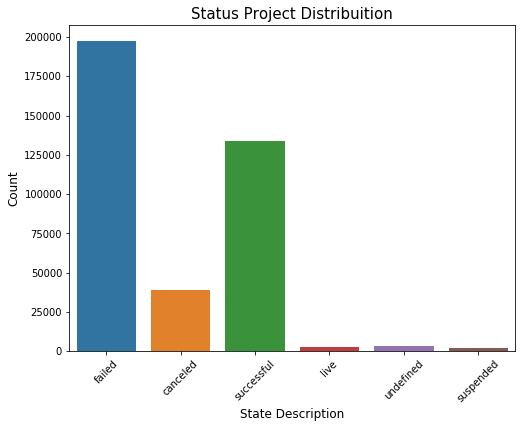

In [6]:
percentual_sucess = round(df_kick["state"].value_counts() / len(df_kick["state"]) * 100,2)

print("State Percentual in %: ")
print(percentual_sucess)

plt.figure(figsize = (8,6))

ax1 = sns.countplot(x="state", data=df_kick)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_title("Status Project Distribuition", fontsize=15)
ax1.set_xlabel("State Description", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

plt.show()

Very interesting percentual ! <br>
just 35,38% of all projects got sucess.<br>
More than half have failed or 10% was canceled

<h1>Let's start looking our Project values</h1> <br>

- I will start exploring the distribuition logarithmn of these values

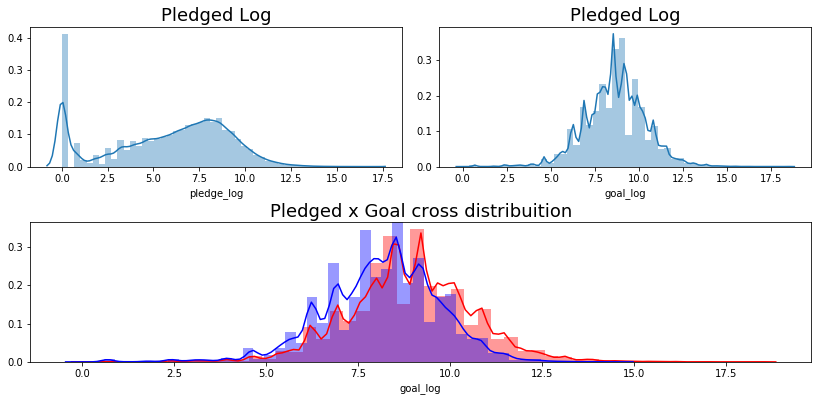

In [7]:
#Normalization to understand the distribuition of the pledge
df_kick["pledge_log"] = np.log(df_kick["pledged"]+ 1)
df_kick["goal_log"] = np.log(df_kick["goal"]+ 1)

df_failed = df_kick[df_kick["state"] == "failed"]
df_sucess = df_kick[df_kick["state"] == "successful"]
df_suspended = df_kick[df_kick["state"] == "suspended"]

plt.figure(figsize = (14,6))
plt.subplot(221)
g = sns.distplot(df_kick["pledge_log"])
g.set_title("Pledged Log", fontsize=18)

plt.subplot(222)
g1 = sns.distplot(df_kick["goal_log"])
g1.set_title("Pledged Log", fontsize=18)

plt.subplot(212)
g2 = sns.distplot(df_failed['goal_log'], color='r')
g2 = sns.distplot(df_sucess['goal_log'], color='b')
g2.set_title("Pledged x Goal cross distribuition", fontsize=18)

plt.subplots_adjust(wspace = 0.1, hspace = 0.4,top = 0.9)

plt.show()

Interesting difference between Pledged and Goal distribuition!  But we cannot see significantly differences beween failed and successful state


<h2>Description of the continous variables</h2>

In [8]:
print("Min Goal and Pledged values")
print(df_kick[["goal", "pledged"]].min())
print("")
print("Mean Goal and Pledged values")
print(round(df_kick[["goal", "pledged"]].mean(),2))
print("")
print("Median Goal and Pledged values")
print(df_kick[["goal", "pledged"]].median())
print("")
print("Max Goal and Pledged values")
print("goal       100000000.0") #If i put the both together give me back log values, 
print("pledged     20338986.27") # so i decide to just show this values
print("dtype: float64")
print("")
print("Std Goal and Pledged values")
print(round(df_kick[["goal", "pledged"]].std(),2))

Min Goal and Pledged values
goal       0.01
pledged    0.00
dtype: float64

Mean Goal and Pledged values
goal       49080.79
pledged     9682.98
dtype: float64

Median Goal and Pledged values
goal       5200.0
pledged     620.0
dtype: float64

Max Goal and Pledged values
goal       100000000.0
pledged     20338986.27
dtype: float64

Std Goal and Pledged values
goal       1183391.26
pledged      95636.01
dtype: float64


<h2>Looking the State variable</h2>
- pledge log by state
- goal log by state
- goal log x pledged log

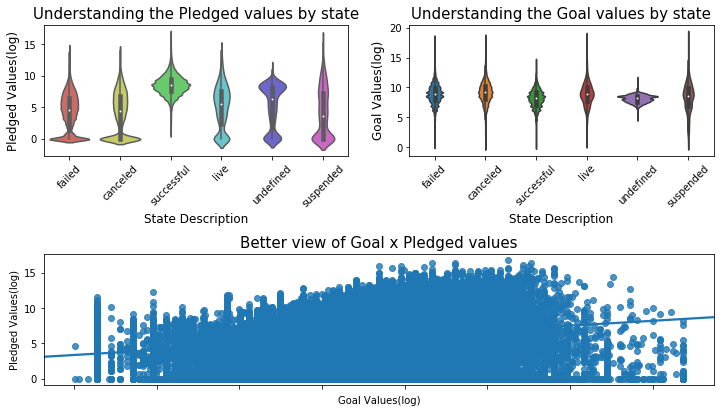

In [9]:
plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.75, top = 0.75)

ax1 = plt.subplot(221)
ax1 = sns.violinplot(x="state", y="pledge_log", 
                     data=df_kick, palette="hls")
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_title("Understanding the Pledged values by state", fontsize=15)
ax1.set_xlabel("State Description", fontsize=12)
ax1.set_ylabel("Pledged Values(log)", fontsize=12)

ax2 = plt.subplot(222)
ax2 = sns.violinplot(x="state", y="goal_log", data=df_kick)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
ax2.set_title("Understanding the Goal values by state", fontsize=15)
ax2.set_xlabel("State Description", fontsize=12)
ax2.set_ylabel("Goal Values(log)", fontsize=12)

ax0 = plt.subplot(212)
ax0 = sns.regplot(x="goal_log", y="pledge_log", 
                    data=df_kick, x_jitter=False)
ax0.set_title("Better view of Goal x Pledged values", fontsize=15)
ax0.set_xlabel("Goal Values(log)")
ax0.set_ylabel("Pledged Values(log)")
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)
plt.show()

<h2>Analysing further the CAaegorys: </h2>
- Sucessful category's frequency
- failed category's frequency
- General Goal Distribuition by Category

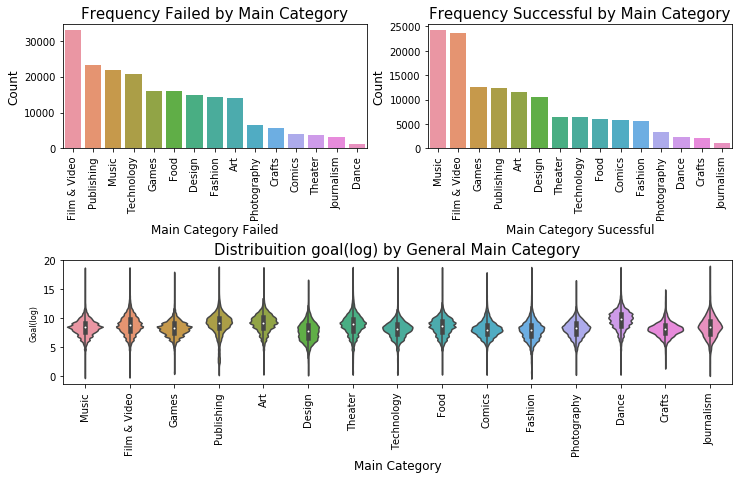

In [10]:
main_cats = df_kick["main_category"].value_counts()
main_cats_failed = df_kick[df_kick["state"] == "failed"]["main_category"].value_counts()
main_cats_sucess = df_kick[df_kick["state"] == "successful"]["main_category"].value_counts()

plt.figure(figsize = (12,8))
plt.subplots_adjust(hspace = 0.9, top = 0.75)

ax0 = plt.subplot(221)
ax0 = sns.barplot(x=main_cats_failed.index, y= main_cats_failed.values, orient='v')
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=90)
ax0.set_title("Frequency Failed by Main Category", fontsize=15)
ax0.set_xlabel("Main Category Failed", fontsize=12)
ax0.set_ylabel("Count", fontsize=12)

ax1 = plt.subplot(222)
ax1 = sns.barplot(x=main_cats_sucess.index, y = main_cats_sucess.values, orient='v')
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax1.set_title("Frequency Successful by Main Category", fontsize=15)
ax1.set_xlabel("Main Category Sucessful", fontsize=12)
ax1.set_ylabel("Count", fontsize=12)

ax2 = plt.subplot(212)
ax2 = sns.violinplot(x="main_category", y="goal_log", data=df_kick)
ax2.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax2.set_title("Distribuition goal(log) by General Main Category", fontsize=15)
ax2.set_xlabel("Main Category", fontsize=12)
ax2.set_ylabel("Goal(log)", fontsize=8)
plt.show()


<h2>Looking the Goal and Pledged Means by State</h2>

In [11]:
print("Looking Goal and Pledged Mean by state ")
print(round(df_kick.groupby(["state"])["goal", "pledged"].mean(),2))

Looking Goal and Pledged Mean by state 
                 goal   pledged
state                          
canceled     86193.06   2645.75
failed       67346.85   1426.97
live         76762.39   9085.24
successful   10162.96  24099.78
suspended   181370.80  10816.81
undefined     4405.39   2279.67


We have a high mean and standard deviation... Interesting values. <br>
Let's known better the distribuition of this values using log scale

<h2>We have a very interesting distribuition in goal values.</h2>

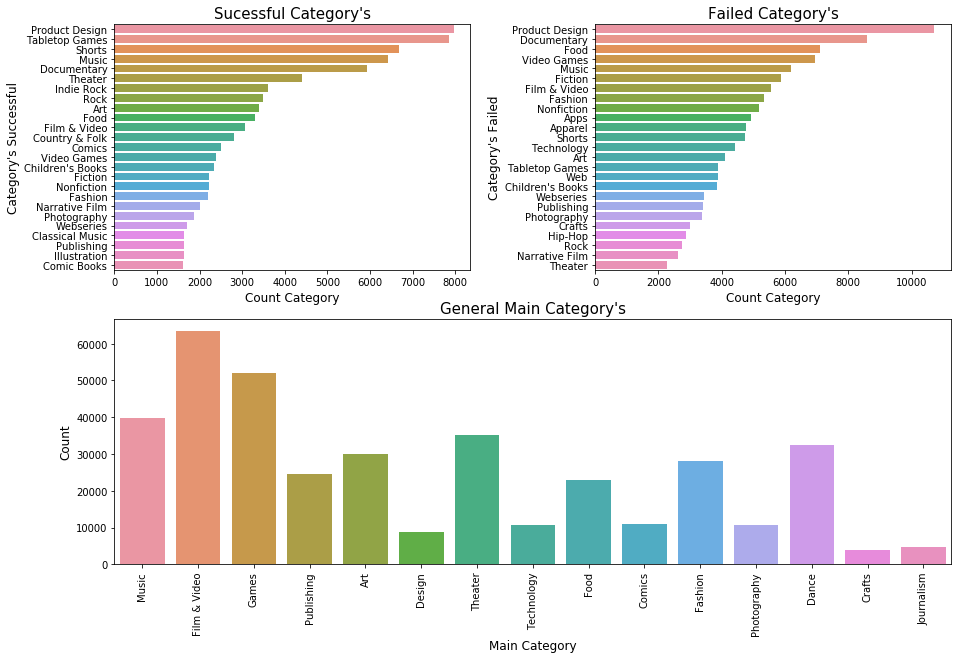

In [12]:
categorys_failed = df_kick[df_kick["state"] == "failed"]["category"].value_counts()[:25]
categorys_sucessful = df_kick[df_kick["state"] == "successful"]["category"].value_counts()[:25]

fig, ax = plt.subplots(ncols=2, figsize=(15,20))
plt.subplots_adjust(wspace = 0.35, top = 0.5)

g1 = plt.subplot(222)
g1 = sns.barplot(x= categorys_failed.values, y=categorys_failed.index, orient='h')
g1.set_title("Failed Category's", fontsize=15)
g1.set_xlabel("Count Category", fontsize=12)
g1.set_ylabel("Category's Failed", fontsize=12)

g2 = plt.subplot(221)
g2 = sns.barplot(x= categorys_sucessful.values, y=categorys_sucessful.index, orient='h')
g2.set_title("Sucessful Category's", fontsize=15)
g2.set_xlabel("Count Category", fontsize=12)
g2.set_ylabel("Category's Successful", fontsize=12)

ax2 = plt.subplot(212)
ax2 = sns.countplot(x="main_category", data=df_kick)
ax2.set_xticklabels(ax1.get_xticklabels(),rotation=90)
ax2.set_title("General Main Category's", fontsize=15)
ax2.set_xlabel("Main Category", fontsize=12)
ax2.set_ylabel("Count", fontsize=12)

plt.show()

<h2>Now I will start to Investigating the 3 top sucess and fail projects</h2>


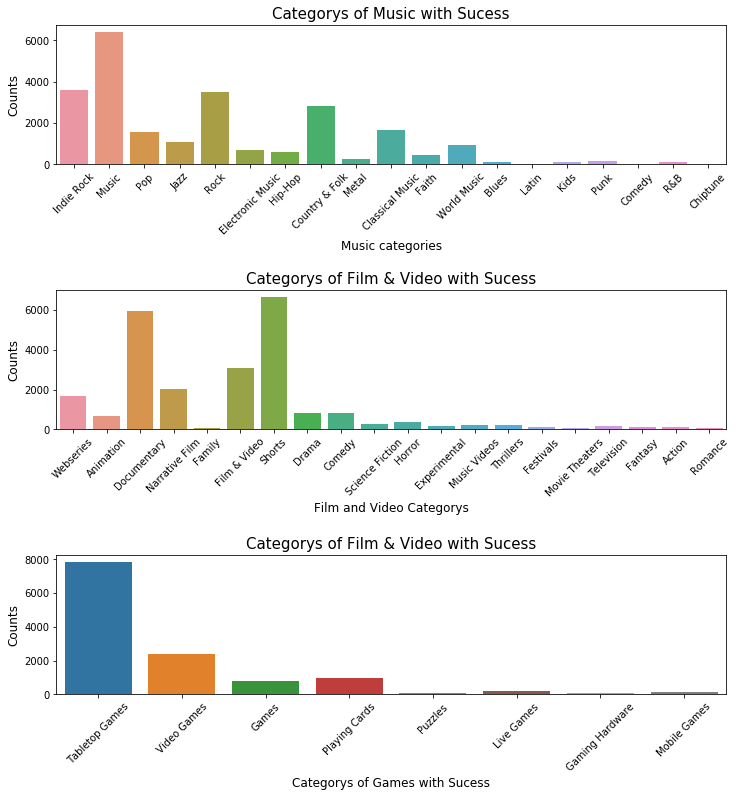

In [13]:
sucess_music = df_kick[(df_kick['main_category'] == 'Music') & 
                      (df_kick['state'] == 'successful')]
sucess_filme_video = df_kick[(df_kick['main_category'] == 'Film & Video') & 
                      (df_kick['state'] == 'successful')]
sucess_games = df_kick[(df_kick['main_category'] == 'Games') & 
                      (df_kick['state'] == 'successful')]

plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
ax0 = sns.countplot(x='category', data=sucess_music)
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=45)
ax0.set_title("Categorys of Music with Sucess", fontsize=15)
ax0.set_xlabel("Music categories", fontsize=12)
ax0.set_ylabel("Counts", fontsize=12)

plt.subplot(3,1,2)
ax1 = sns.countplot(x='category', data=sucess_filme_video)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_title("Categorys of Film & Video with Sucess", fontsize=15)
ax1.set_xlabel("Film and Video Categorys", fontsize=12)
ax1.set_ylabel("Counts", fontsize=12)

plt.subplot(3,1,3)
ax2 = sns.countplot(x='category', data=sucess_games)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
ax2.set_title("Categorys of Film & Video with Sucess", fontsize=15)
ax2.set_xlabel("Categorys of Games with Sucess", fontsize=12)
ax2.set_ylabel("Counts", fontsize=12)

plt.subplots_adjust(wspace = 0.3, hspace = 0.9,top = 0.9)

plt.show()

<h2>Main Category</h2>

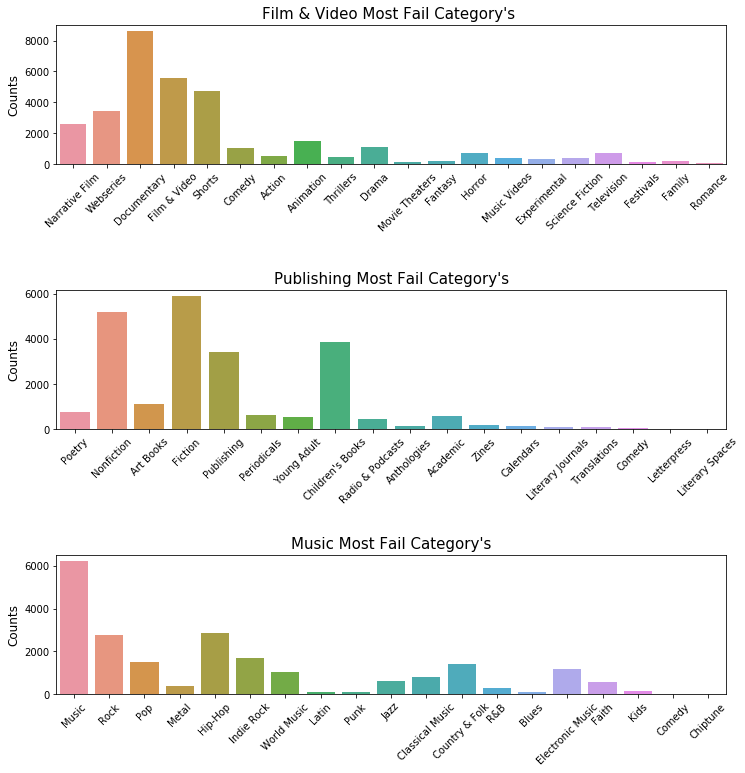

In [15]:
failed_film = df_kick[(df_kick['main_category'] == 'Film & Video') & 
                      (df_kick['state'] == 'failed')]
failed_publishing = df_kick[(df_kick['main_category'] == 'Publishing') & 
                      (df_kick['state'] == 'failed')]
failed_music = df_kick[(df_kick['main_category'] == 'Music') & 
                      (df_kick['state'] == 'failed')]

plt.figure(figsize=(12,12))

plt.subplot(3,1,1)
ax0 = sns.countplot(x='category', data=failed_film)
ax0.set_xticklabels(ax0.get_xticklabels(),rotation=45)
ax0.set_title("Film & Video Most Fail Category's ", fontsize=15)
ax0.set_xlabel("", fontsize=12)
ax0.set_ylabel("Counts", fontsize=12)

plt.subplot(3,1,2)
ax1 = sns.countplot(x='category', data=failed_publishing)
ax1.set_xticklabels(ax1.get_xticklabels(),rotation=45)
ax1.set_title("Publishing Most Fail Category's", fontsize=15)
ax1.set_xlabel("", fontsize=12)
ax1.set_ylabel("Counts", fontsize=12)

plt.subplot(3,1,3)
ax2 = sns.countplot(x='category', data=failed_music)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation=45)
ax2.set_title("Music Most Fail Category's", fontsize=15)
ax2.set_xlabel("", fontsize=12)
ax2.set_ylabel("Counts", fontsize=12)

plt.subplots_adjust(wspace = 0.5, hspace = 0.9,top = 0.9)
plt.show()

In the musics with sucess the most frequent is Indie, and fails is Rock and Hip Hop! 

Another interesting thing, is that Documentary is a significant value in both states... 

<h1> Looking the time and another features  </h1>


In [16]:
df_kick['launched'] = pd.to_datetime(df_kick['launched'])
df_kick['laun_month_year'] = df_kick['launched'].dt.to_period("M")
df_kick['laun_year'] = df_kick['launched'].dt.to_period("A")

df_kick['deadline'] = pd.to_datetime(df_kick['deadline'])
df_kick['dead_month_year'] = df_kick['deadline'].dt.to_period("M")
df_kick['dead_year'] = df_kick['launched'].dt.to_period("A")

In [17]:
#Creating a new columns with Campaign total months
df_kick['time_campaign'] = df_kick['dead_month_year'] - df_kick['laun_month_year']
df_kick['time_campaign'] = df_kick['time_campaign'].astype(int)


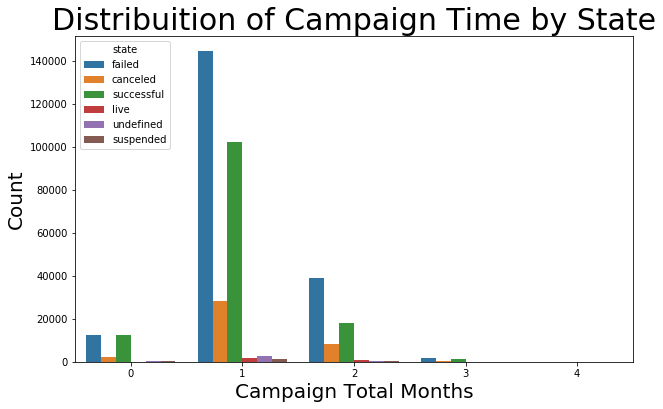

Descriptions of Campaign Time x State
state          canceled  failed  live  successful  suspended  undefined
time_campaign                                                          
0                  2044   12276    62       12494        153        280
1                 28144  144494  1785      102102       1251       2710
2                  8132   38960   948       18240        433        570
3                   453    1976     4        1117          8          2
4                     0      13     0           3          0          0


In [18]:
plt.figure(figsize = (10,6))

ax = sns.countplot(x='time_campaign', hue='state', 
                   data=df_kick[df_kick['time_campaign'] < 10])
ax.set_title("Distribuition of Campaign Time by State", fontsize=30)
ax.set_xlabel("Campaign Total Months", fontsize=20)
ax.set_ylabel("Count", fontsize=20)
plt.show()

print("Descriptions of Campaign Time x State")
print(pd.crosstab(df_kick[df_kick['time_campaign'] < 5]['time_campaign'], df_kick.state))

In [19]:
df_kick.laun_month_year = df_kick.laun_month_year.dt.strftime('%Y-%m')
df_kick.laun_year = df_kick.laun_year.dt.strftime('%Y')

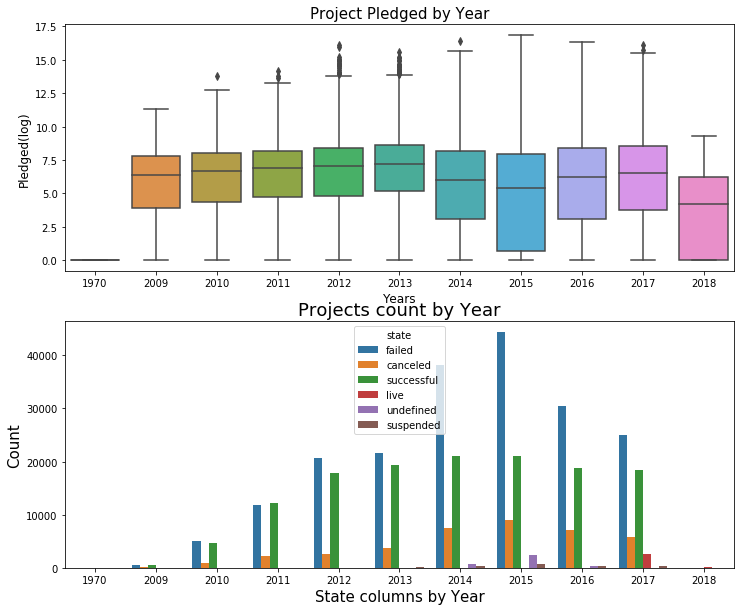

Descriptive status count by year
state      canceled  failed  live  successful  suspended  undefined
laun_year                                                          
1970              6       0     0           0          1          0
2009            150     600     0         579          0          0
2010            926    4984     0        4593         16          0
2011           2144   11878     0       12171         44          0
2012           2631   20588     0       17892         52          2
2013           3690   21686     0       19415         58          2
2014           7418   38199     0       21107        270        751
2015           8927   44301     0       20971        721       2380
2016           7119   30526     2       18766        344        427
2017           5766   24957  2675       18462        340          0
2018              2       0   122           0          0          0


In [20]:
year = df_kick['laun_year'].value_counts()
month = df_kick['laun_month_year'].value_counts()

fig, ax = plt.subplots(2,1, figsize=(12,10))

ax1 = sns.boxplot(x="laun_year", y='pledge_log', data=df_kick, ax=ax[0])
ax1.set_title("Project Pledged by Year", fontsize=15)
ax1.set_xlabel("Years", fontsize=12)
ax1.set_ylabel("Pledged(log)", fontsize=12)

ax2 = sns.countplot(x="laun_year", hue='state', data=df_kick, ax=ax[1])
ax2.set_title("Projects count by Year", fontsize=18)
ax2.set_xlabel("State columns by Year", fontsize=15)
ax2.set_ylabel("Count", fontsize=15)

#order=['1970','2009','2010','2011','2012',
#'2013','2014','2015', '2016', '2017','2018']
# Why the order are not working? 
plt.show()

print("Descriptive status count by year")
print(pd.crosstab(df_kick.laun_year, df_kick.state))

<h2>Creating a new feature to calc the % of pledged x goal</h2>

In [21]:
df_kick['diff_pleded_goal'] = round(df_kick['pledge_log'] / df_kick['goal_log'] * 100,2)
df_kick['diff_pleded_goal'] = df_kick['diff_pleded_goal'].astype(float)

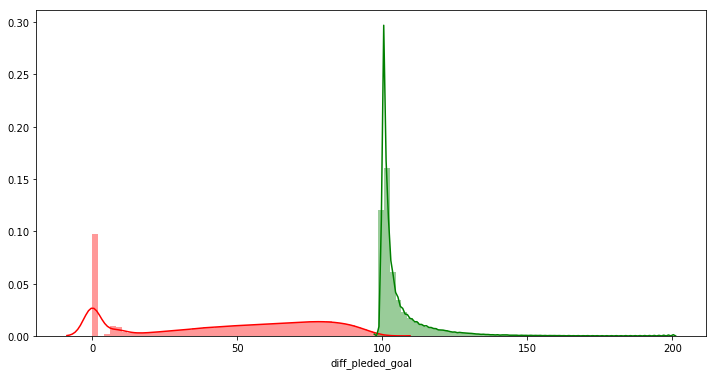

In [22]:
plt.figure(figsize = (12,6))
sns.distplot(df_kick[(df_kick['diff_pleded_goal'] < 200) & 
                     (df_kick['state'] == 'failed')]['diff_pleded_goal'], color='r')
sns.distplot(df_kick[(df_kick['diff_pleded_goal'] < 200) & 
                     (df_kick['state'] == 'successful')]['diff_pleded_goal'],color='g')
plt.show()

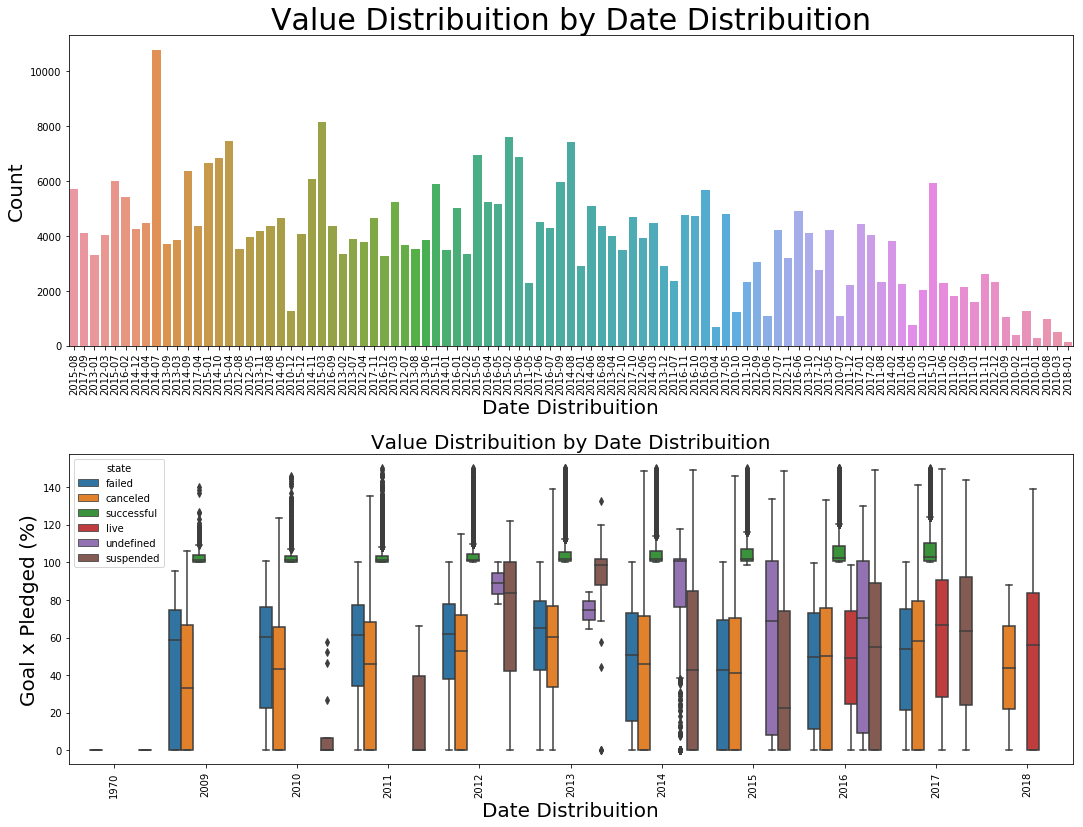

In [23]:
plt.figure(figsize = (18,15))

plt.subplots_adjust(hspace = 0.35, top = 0.8)

g1 = plt.subplot(211)
g1 = sns.countplot(x="laun_month_year", data=df_kick[df_kick['laun_month_year'] >= '2010-01'])
g1.set_xticklabels(g1.get_xticklabels(),rotation=90)
g1.set_title("Value Distribuition by Date Distribuition", fontsize=30)
g1.set_xlabel("Date Distribuition", fontsize=20)
g1.set_ylabel("Count", fontsize=20)

g2 = plt.subplot(212)
g2 = sns.boxplot(x="laun_year", y="diff_pleded_goal",
                 data=df_kick[df_kick['diff_pleded_goal'] < 150], 
                 hue="state")
g2.set_xticklabels(g2.get_xticklabels(),rotation=90)
g2.set_title("Value Distribuition by Date Distribuition", fontsize=20)
g2.set_xlabel("Date Distribuition", fontsize=20)
g2.set_ylabel("Goal x Pledged (%)", fontsize=20)
plt.show()

Looking the difference pledged x goal between failed and sucessful 

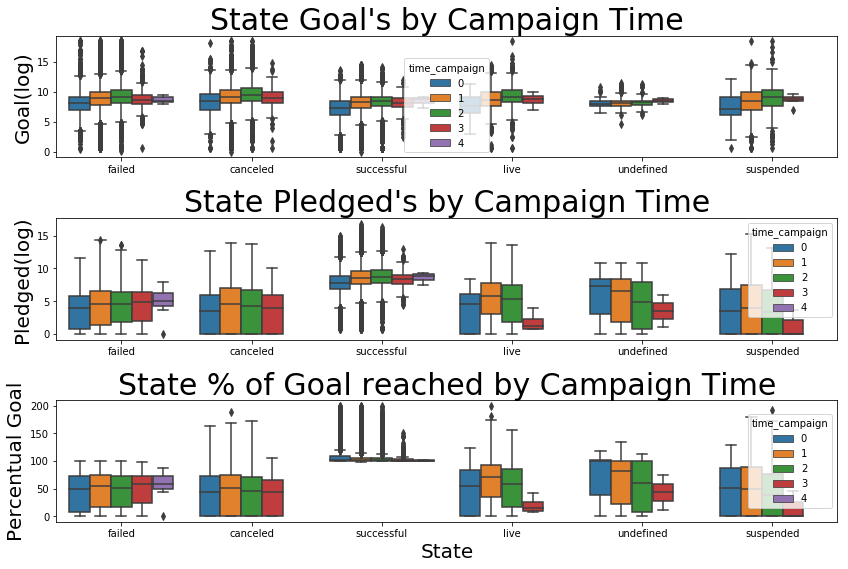

In [24]:
plt.figure(figsize = (14,10))

plt.subplots_adjust(hspace = 0.50, top = 0.8)

plt.subplot(311)
g =sns.boxplot(x='state', y='goal_log', 
            data=df_kick[df_kick['time_campaign'] < 10], 
            hue='time_campaign')
g.set_title("State Goal's by Campaign Time", fontsize=30)
g.set_xlabel("", fontsize=20)
g.set_ylabel("Goal(log)", fontsize=20)

plt.subplot(312, sharex=g)
g1 = sns.boxplot(x='state', y='pledge_log', 
            data=df_kick[df_kick['time_campaign'] < 10], 
            hue='time_campaign')
g1.set_title("State Pledged's by Campaign Time", fontsize=30)
g1.set_xlabel("", fontsize=20)
g1.set_ylabel("Pledged(log)", fontsize=20)

plt.subplot(313)
g2 = sns.boxplot(x='state', y='diff_pleded_goal', 
            data=df_kick[(df_kick['time_campaign'] < 10) & (df_kick['diff_pleded_goal'] < 200)], 
            hue='time_campaign')
g2.set_title("State % of Goal reached by Campaign Time", fontsize=30)
g2.set_xlabel("State", fontsize=20)
g2.set_ylabel("Percentual Goal", fontsize=20)
plt.show()

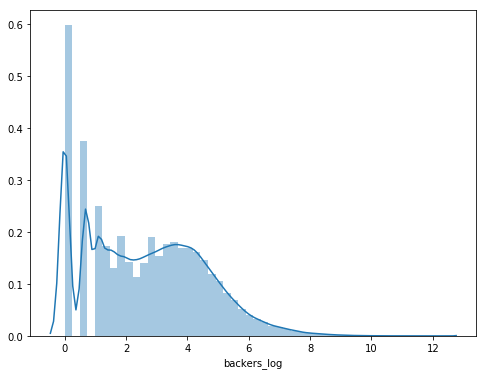

In [25]:
df_kick['backers_log'] = np.log(df_kick['backers'] + 1 ) 
#The + 1 is to normalize the zero or negative values

plt.figure(figsize = (8,6))
sns.distplot(df_kick['backers_log'])

plt.show()

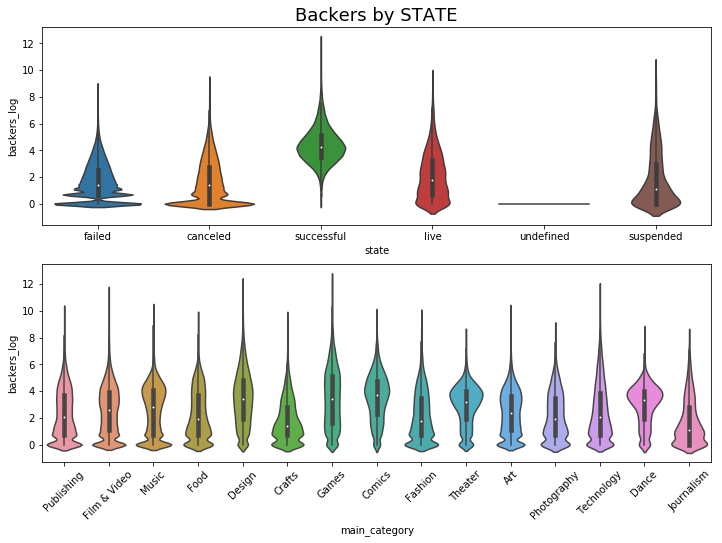

In [26]:
plt.figure(figsize = (12,8))

plt.subplot(211)
g = sns.violinplot(x='state',y='backers_log', 
               data=df_kick)
g.set_title("Backers by STATE", fontsize=18)

plt.subplot(212)
g = sns.violinplot(x='main_category',y='backers_log', 
                   data=df_kick)
g.set_xticklabels(g.get_xticklabels(),rotation=45)

plt.show()

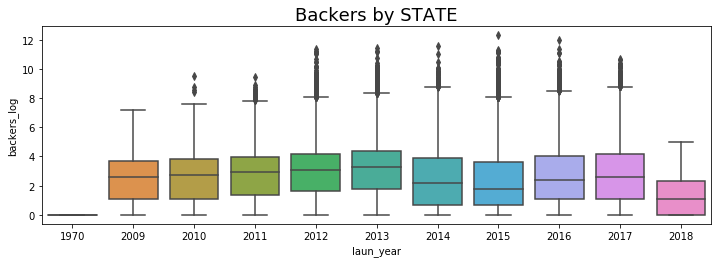

In [27]:
plt.figure(figsize = (12,8))

plt.subplot(211)
g = sns.boxplot(x='laun_year',y='backers_log', 
               data=df_kick)
g.set_title("Backers by STATE", fontsize=18)

plt.show()

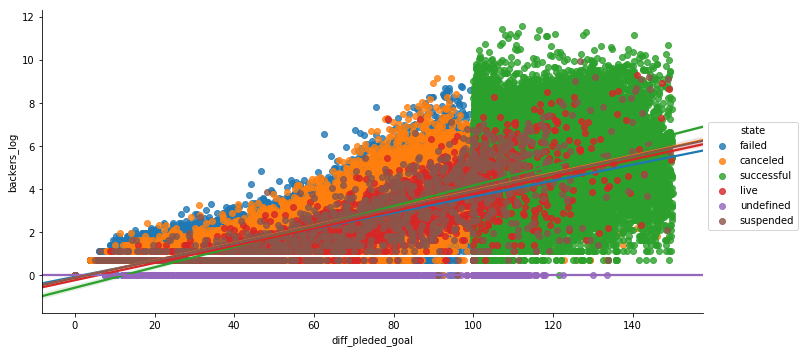

In [28]:
#Looking the relation of Backers and % of goal reached
sns.lmplot(x='diff_pleded_goal', y ='backers_log', 
           data=df_kick[df_kick['diff_pleded_goal'] < 150], size = 5, aspect = 2,
           hue='state')
plt.show()

<h1>Conclusions: </h1>

<i>I will continue</i>


    